In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../../references/exercise/DATA/Ames_Housing_Data.csv")

In [3]:
numeric_df = df.select_dtypes(include = np.number)

In [4]:
# correlation of each features with target label and sorting them
numeric_df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

- Check for highly correlated features and plot to visualize the outlying points
- Highly correlated features are the one that impact the target label most
- here `Overall Qual` and `Gr Liv Area` are the the one having high correlation with `SalePrice` (i.e Quality of the house and size of living area has high impact on the price of a house)

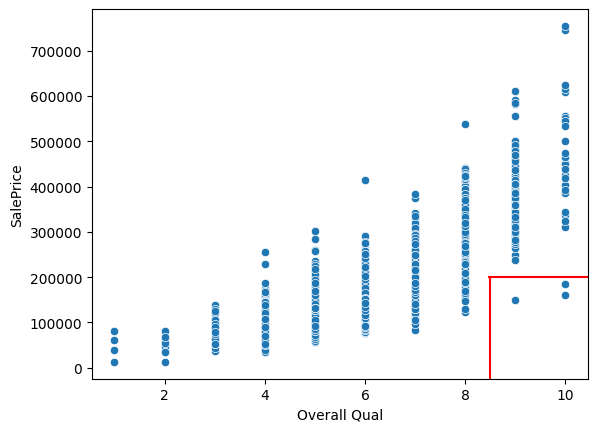

In [5]:
sns.scatterplot(data = df, x = 'Overall Qual' , y = 'SalePrice')
plt.axhline(y=200000, xmin = 0.8, c = 'red')
plt.axvline(x = 8.5, ymax = 0.27, c = 'red');

- here, it is obvious that the increase in quality makes sale price high
- the concern is what makes some houses to be sold below $200k with highest quality

- we can see at the plot there are 3 points (inside red box) that are actually houses with best quality and sold under $200k

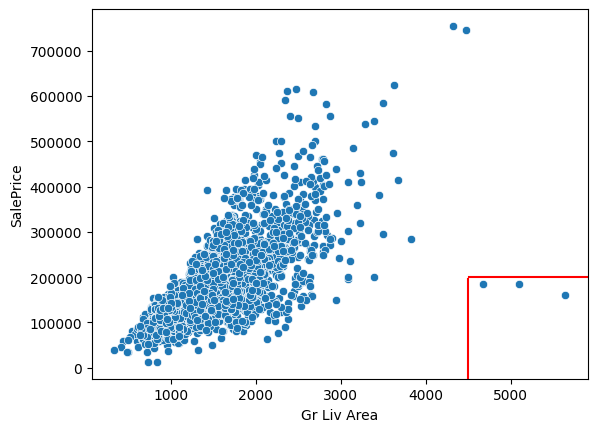

In [6]:
sns.scatterplot(data = df , x = 'Gr Liv Area', y ='SalePrice')
plt.axhline(y=200000, xmin = 0.76, c = 'red')
plt.axvline(x = 4500, ymax = 0.27, c = 'red');

- again if we see the plot living area vs Sales price ther are 3 points with maximum living area but sold under $200k
- From the visualization we can clearly say that there are 3 data points that are actually are outliers

In [7]:
df_new = df[(df['SalePrice']<200000) & (df['Overall Qual'] > 8.5)]
df_new

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [8]:
df_new = df[(df['SalePrice']<200000) & (df['Gr Liv Area']> 4500)]
df_new

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [9]:
df_new.index

Index([1498, 2180, 2181], dtype='int64')

In [10]:
final_df = df.drop(labels = df_new.index , axis = 0)

In [11]:
len(df), len(final_df)

(2930, 2927)

In [12]:
final_df.to_csv('./Ames_housing_outliers_removed.csv', index=False)